 ### Importing Libraries

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import Dense

In [ ]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('arabic')

In [2]:
DATA_PATH="../input/my-task/preprocessed_df.csv"

In [3]:
#Reading Dataframe file
df=pd.read_csv(DATA_PATH)

In [4]:
df.head()

,id,texts,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون ...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [5]:
df.drop_duplicates(subset=["texts","dialect"],inplace=True)

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458191 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458191 non-null  int64 
 1   texts    458191 non-null  object
 2   dialect  458191 non-null  object
dtypes: int64(1), object(2)
memory usage: 14.0+ MB


### EDA

<AxesSubplot:ylabel='dialect'>

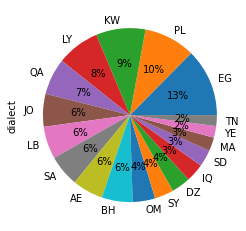

In [8]:
df.dialect.value_counts().plot(kind='pie', autopct='%1.0f%%')

Text(0, 0.5, 'Count')

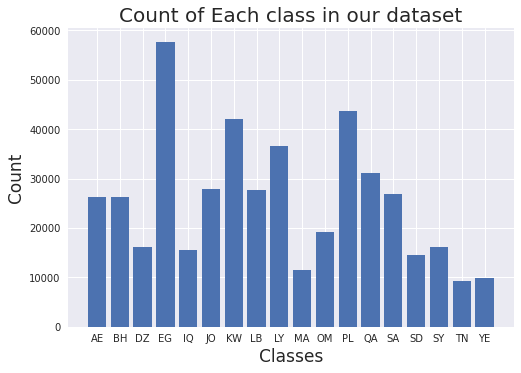

In [9]:
grouped_df = df.groupby(['dialect']).count().reset_index()
plt.style.use("seaborn")
plt.bar(grouped_df["dialect"],grouped_df["texts"])
plt.title("Count of Each class in our dataset",fontdict={"size":20})
plt.xlabel("Classes",fontdict={"size":17})
plt.ylabel("Count",fontdict={"size":17})


In [10]:
grouped_df=grouped_df.drop(columns=["id"]).rename(columns={"texts":"count"})
grouped_df

,dialect,count
0,AE,26296
1,BH,26291
2,DZ,16183
3,EG,57635
4,IQ,15497
5,JO,27921
6,KW,42108
7,LB,27617
8,LY,36499
9,MA,11539


In [11]:
list(set(df["dialect"]))

['SA',
 'LY',
 'SY',
 'OM',
 'PL',
 'QA',
 'EG',
 'SD',
 'BH',
 'DZ',
 'LB',
 'AE',
 'JO',
 'MA',
 'IQ',
 'KW',
 'TN',
 'YE']

In [12]:
# # # ## balancing the data
min_num_classes=9927
classes=list(set(df["dialect"]))
i=0
dff=pd.DataFrame({"id":[],"texts":[],"dialect":[]})
for class_item in  classes:
    if df[df["dialect"]==class_item].shape[0]>min_num_classes:
        class_item=df[df["dialect"]==class_item].sample(n=min_num_classes).reset_index(drop=True)
    else:
        class_item=df[df["dialect"]==class_item]

    dff = pd.concat([dff,class_item])
dff["id"]=dff["id"].astype("int")
df=dff.sample(frac=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178005 entries, 9180 to 5590
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       178005 non-null  int64 
 1   texts    178005 non-null  object
 2   dialect  178005 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.4+ MB


Text(0, 0.5, 'Count')

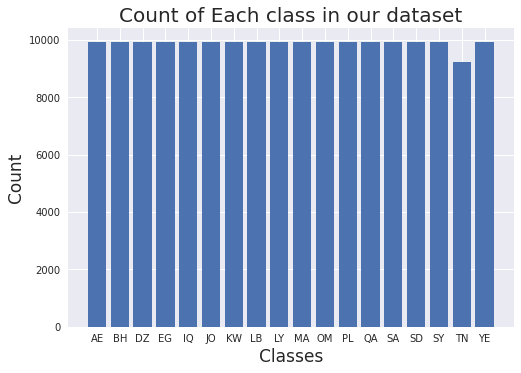

In [14]:
grouped_df = df.groupby(['dialect']).count().reset_index()
plt.style.use("seaborn")
plt.bar(grouped_df["dialect"],grouped_df["texts"])
plt.title("Count of Each class in our dataset",fontdict={"size":20})
plt.xlabel("Classes",fontdict={"size":17})
plt.ylabel("Count",fontdict={"size":17})

In [15]:
length_lst=[]
for i,row in df.iterrows():
    try:
        length_lst.append(len(row["texts"]))
    except:
        continue
print(f"the maximum text length is:{max(length_lst)}")

the maximum text length is:280


In [16]:
labels = df["dialect"]
vectorizer = TfidfVectorizer(max_features=7500, stop_words=stopwords.words('arabic'))
processed_features = vectorizer.fit_transform(df["texts"].astype("U").tolist())

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  % sorted(inconsistent)


In [17]:
X_train, X_test,y_train,y_test= train_test_split(processed_features, labels, test_size=0.2,shuffle=True)

In [18]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [19]:
encoder = LabelEncoder()
encoder.fit(labels)
labels=encoder.fit_transform(labels)

num_classes = int((len(set(labels))))
print((len(set(labels))))

y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

18


In [20]:
y_train= tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [21]:
X_train[0].shape

(7500,)

In [22]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [23]:
import keras.backend as K
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

from keras.metrics import Precision , Recall , Accuracy , TruePositives , TrueNegatives , FalsePositives , FalseNegatives

In [24]:
# Build the model
model = Sequential()
model.add(Dense(1024,activation='relu',input_shape=(7500,))) 
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy','Recall','Precision',f1_metric])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              7681024   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 18)                4626      
_________________________________________________________________
activation (Activation)      (None, 18)                0         
Total params: 7,948,050
Trainable params: 7,948,050
Non-trainable params: 0
______________________________________________

2022-03-09 17:40:33.476816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 17:40:33.569550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 17:40:33.570317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 17:40:33.571469: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [25]:
#####Import Note should be taken into you coonsideration 

'''AS appear here there is a significant overfitting althogh I have reduced the number of layers of my model 
I tried to use different architecture but still overfitting this due to:
###(the small amount of data that I used to be trained on it 178*.8=142 thousand row from actual size .8*458=336 thousand)

Why I do that using only 1/3 of data size:
1- you are thinking that I used 1/3 of my data to overcome imbalanced data problem but
2- I had to use 1/3 of the data due to meomry run out problem as:

-----------> If I increased the data up to the actual size 336 to be trained on, the session of notebook will be crashed 
due to meomry ram sapce 
-----------> if I increased the number of Features more than 7500 as appeard in tf-idf processing, the session of notebook will be crashed 
due to meomry ram sapce 

-- I tried to run this model on public colab 12.5 gb ram (not colab pro 25 gb ram) but it was failed due to same problem (ram space)
-- I tried to run this model on AWS Notebook instance Segamaker with public resources but it was failed due to same problem (ram space)
-- I ran it on Kaggle as you see in this notebook, It was finally trained in with 7500 Features and 142 thousand row 
maximum limit of data vloume and features number to get my model traind

'''


batch_size =8
epochs = 20
history = model.fit(X_train,y_train,
                    batch_size=8,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)


model.save('my_model.h1')

2022-03-09 17:40:38.516020: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3844890000 exceeds 10% of free system memory.
2022-03-09 17:40:42.576901: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3844890000 exceeds 10% of free system memory.
2022-03-09 17:40:45.426451: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
16021/16021 [==============================] - 78s 5ms/step - loss: 2.1851 - categorical_accuracy: 0.3183 - recall: 0.1430 - precision: 0.7479 - f1_metric: 0.2206 - val_loss: 1.9644 - val_categorical_accuracy: 0.3865 - val_recall: 0.1934 - val_precision: 0.8057 - val_f1_metric: 0.2926
Epoch 2/20
16021/16021 [==============================] - 76s 5ms/step - loss: 1.8458 - categorical_accuracy: 0.4293 - recall: 0.2567 - precision: 0.7711 - f1_metric: 0.3668 - val_loss: 1.9273 - val_categorical_accuracy: 0.3990 - val_recall: 0.2239 - val_precision: 0.7814 - val_f1_metric: 0.3294
Epoch 3/20
16021/16021 [==============================] - 76s 5ms/step - loss: 1.6501 - categorical_accuracy: 0.4894 - recall: 0.3286 - precision: 0.7946 - f1_metric: 0.4472 - val_loss: 1.9332 - val_categorical_accuracy: 0.3973 - val_recall: 0.2433 - val_precision: 0.7448 - val_f1_metric: 0.3491
Epoch 4/20
16021/16021 [==============================] - 76s 5ms/step - loss: 1.4763 - categorical_accuracy:

2022-03-09 18:07:08.685487: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [26]:
result_df=pd.DataFrame(history.history)

In [27]:
# plt.style.use('seaborn')
# plt.style.use("seaborn")
# p1=plt.plot(history.history["categorical_accuracy"])
# p2=plt.plot(history.history["val_categorical_accuracy"])
# plt.xlabel("Iteratioons",fontsize=15)
# plt.ylabel("Loss",fontsize=15)
# plt.title("Model accuracy vs Iterations",fontsize=30)
# plt.legend(["training_accuracy","val_accuracy"])

In [28]:
#model = keras.models.load_model('my_model.h1')
Evaluation_valus = model.evaluate(X_test,y_test,verbose=0)
print("Loss" ,'categorical_accuracy','Recall','Precision',f1_metric)

print(Evaluation_valus)

2022-03-09 18:08:05.272608: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1068030000 exceeds 10% of free system memory.
2022-03-09 18:08:06.385081: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1068030000 exceeds 10% of free system memory.


Loss categorical_accuracy Recall Precision <function f1_metric at 0x7f61f1448f80>
[3.3976757526397705, 0.37934327125549316, 0.32338979840278625, 0.5131484866142273, 0.39489418268203735]


In [29]:
df["texts"][0:25].astype("U").tolist()

['بأغلب الاحيان لما الكلب يوقع بين إيدين الاسد ويصير الكلب ينبح شهامة من الاسد بيتركوا ينبح رغم انو الاسد قادر ومتعطش وجائع ليلتهمه عن هيدا لطلع يتزحلط عالتلج اتكلم',
 'بغيبتك عم ندير بالنا عالحبايب',
 'خايفه اروح يطلعلي السمك ويشكيلي همه',
 'والاصغر منو شويه خلو',
 'صممها موقع مشهور لكن مش عارف كيف عمل هذا الخطأ الواضح',
 'لوسي شفته بس هلأ بحضره',
 'اصعب سؤال ممكن يسألوه لي في رمضان شنو احسن اكله تحبها يا سيدي شن انقولك ممكن الاخضر و اليابس',
 'مصدر سعادتك الصلاه و القرآن و عيلتي و صحابي و الاسماعيلي بس مش الفتره دي',
 'لكن ما عشان الطبخ',
 'ياخ البنات ديل دعايات خلاص ياخ دي قلت ليها انت عويرة قالت تعور عينك قلت ليها حمارة قالت يحمروك في الزيت قلت ليها حيوان قالت تحوم في الصحراء',
 'نيمار اليوم طاح اكثر من طيحة الدينار الليبي',
 'انته شكلك متخربط اكيد اكيد اكييييد مو انا',
 'والربلي أفضل من ريتويت',
 'شكرا برشلونة على المتعة الكروية اللي متعتونا بها امس',
 'حسبي الله عليهم طب اقل اشي يخلوك تفطر بالبيت وتنزل بعدها الشغل يخربيتهم ما اوسخهم الله يعينك يا حب',
 'منشنو ونا اولكم لاتخافون',

In [30]:
X_train[0].shape

(7500,)

In [31]:
import pickle

# saving
with open('vectorizer.pickle', 'wb') as handle:
    pickle.dump('vectorizer.pickle', handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('vectorizer.pickle', 'rb') as handle:
#     vectorizer = pickle.load(handle)

In [32]:
features = vectorizer.transform(df["texts"][0:25].astype("U").tolist())
features=features.toarray()
features.shape

(25, 7500)

In [33]:
features = vectorizer.transform(df["texts"][0:25].astype("U").tolist())
features=features.toarray()

cc=model.predict(features)
xc = encoder.inverse_transform(np.argmax(cc,axis=1).reshape(-1,1))
    
l=df["dialect"][0:25].to_list()
for i in range(len(l)):
    print("the predicted label is", xc.reshape(-1,1)[i], "the true labels is" ,np.array(l).reshape(-1,1)[i])


the predicted label is ['LB'] the true labels is ['LB']
the predicted label is ['LB'] the true labels is ['LB']
the predicted label is ['EG'] the true labels is ['EG']
the predicted label is ['SD'] the true labels is ['SD']
the predicted label is ['PL'] the true labels is ['DZ']
the predicted label is ['JO'] the true labels is ['JO']
the predicted label is ['LY'] the true labels is ['LY']
the predicted label is ['EG'] the true labels is ['EG']
the predicted label is ['OM'] the true labels is ['OM']
the predicted label is ['SD'] the true labels is ['SD']
the predicted label is ['LY'] the true labels is ['LY']
the predicted label is ['KW'] the true labels is ['KW']
the predicted label is ['AE'] the true labels is ['SY']
the predicted label is ['AE'] the true labels is ['AE']
the predicted label is ['PL'] the true labels is ['PL']
the predicted label is ['AE'] the true labels is ['AE']
the predicted label is ['MA'] the true labels is ['MA']
the predicted label is ['PL'] the true labels is

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
